In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('2016-12-31.csv')
df.head()

,date,lat_bin,lon_bin,flag,geartype,vessel_hours,fishing_hours,mmsi_present
0,2016-12-31,-1261,1320,AGO,purse_seines,9.692361,0.0,1
1,2016-12-31,-991,1275,AGO,trawlers,0.191389,0.0,1
2,2016-12-31,-990,1274,AGO,trawlers,0.233611,0.0,1
3,2016-12-31,-985,1272,AGO,trawlers,0.310000,0.0,1
4,2016-12-31,-982,1271,AGO,trawlers,0.235972,0.0,1


In [3]:
df.tail()

,date,lat_bin,lon_bin,flag,geartype,vessel_hours,fishing_hours,mmsi_present
179471,2016-12-31,-3329,1716,ZAF,drifting_longlines,0.433889,0.433889,1
179472,2016-12-31,-3329,1722,ZAF,drifting_longlines,0.271806,0.178750,1
179473,2016-12-31,-3329,1721,ZAF,drifting_longlines,0.263194,0.175139,1
179474,2016-12-31,-3329,1715,ZAF,drifting_longlines,0.456528,0.456528,1
179475,2016-12-31,-3329,1720,ZAF,drifting_longlines,0.203750,0.203750,1


In [4]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179476 entries, 0 to 179475
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           179476 non-null  object 
 1   lat_bin        179476 non-null  int64  
 2   lon_bin        179476 non-null  int64  
 3   flag           179476 non-null  object 
 4   geartype       179476 non-null  object 
 5   vessel_hours   179476 non-null  float64
 6   fishing_hours  179476 non-null  float64
 7   mmsi_present   179476 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 11.0+ MB
Index(['date', 'lat_bin', 'lon_bin', 'flag', 'geartype', 'vessel_hours',
       'fishing_hours', 'mmsi_present'],
      dtype='object')


In [5]:
df= df.sample(frac = 0.15) 

In [6]:
df.lat_bin = df.lat_bin/100
df.lon_bin = df.lon_bin/100

(Text(0.5, 1.0, 'lon Vs lat'), Text(0.5, 0, 'lon'), Text(0, 0.5, 'lat'))

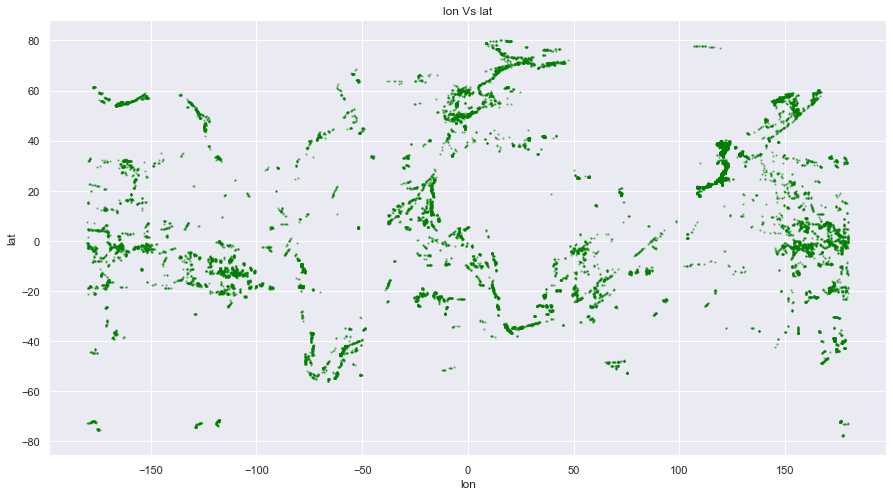

In [7]:
plt.figure(figsize=(15,8))

X1 = df.loc[:,["lon_bin","lat_bin"]]
X1 = X1.values
plt.scatter(X1[:, 0], X1[:, 1], alpha= 0.4, s=np.pi/2, color="green")
plt.title("lon Vs lat"), plt.xlabel('lon'), plt.ylabel('lat')



In [8]:
HC = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
HC.fit(X1)
y1 = HC.labels_

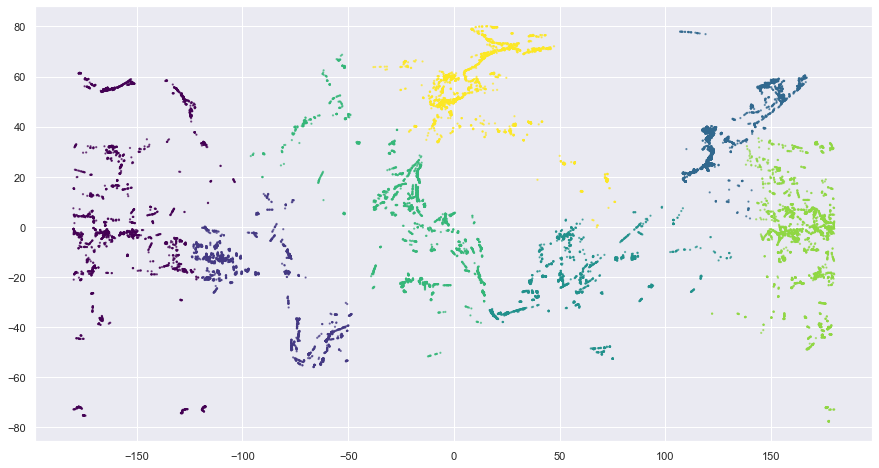

In [10]:
plt.figure(figsize=(15,8))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=np.pi/2, cmap='viridis', alpha = 0.6)

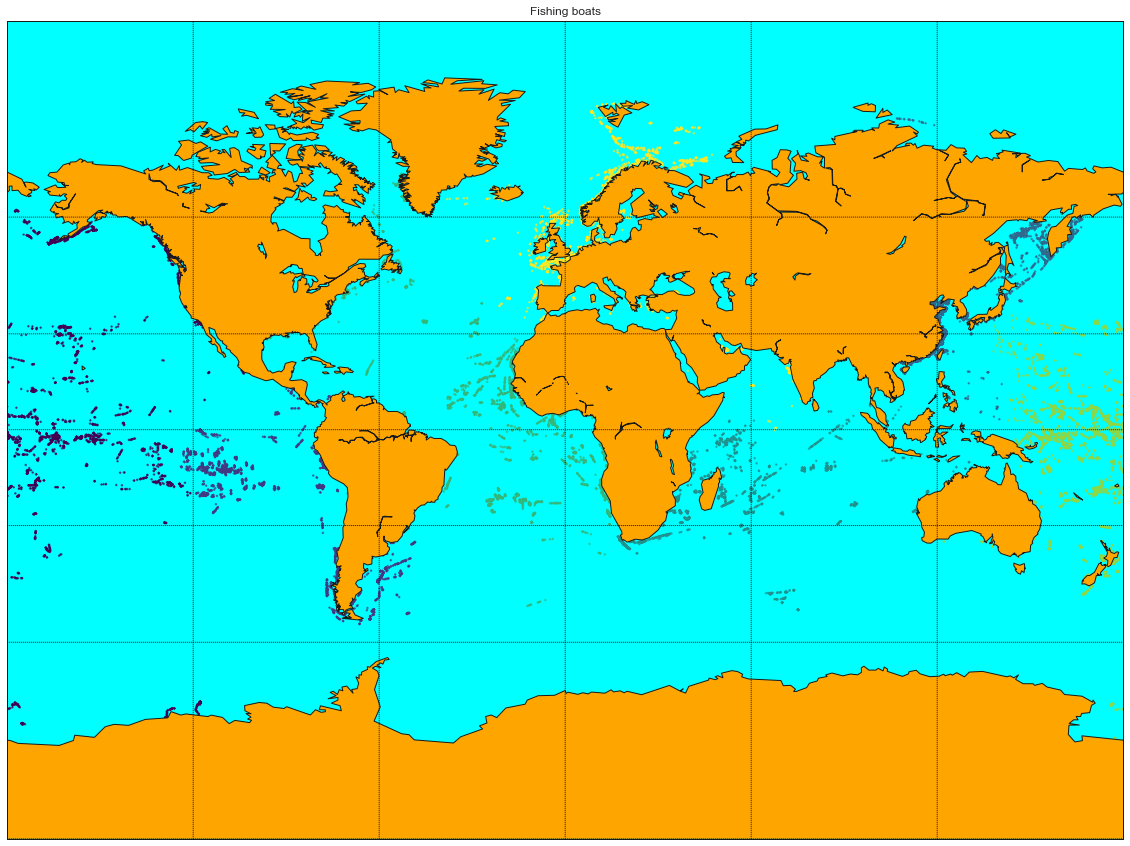

In [13]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x,y = m(X1[:, 0],X1[:, 1])
m.scatter(x,y, c=y1 ,marker='D', s=np.pi/2, cmap='viridis', alpha = 0.6)

plt.title("Fishing boats")
plt.show()

In [14]:
# Focus on a region

llat=-14
ulat=51
llon=46
ulon=151

df=df[(df['lon_bin']>llon) & (df['lon_bin']<ulon) & 
      (df['lat_bin']>llat) & (df['lat_bin']<ulat)]
print("Number of final datapoints:",len(df))

Number of final datapoints: 10156


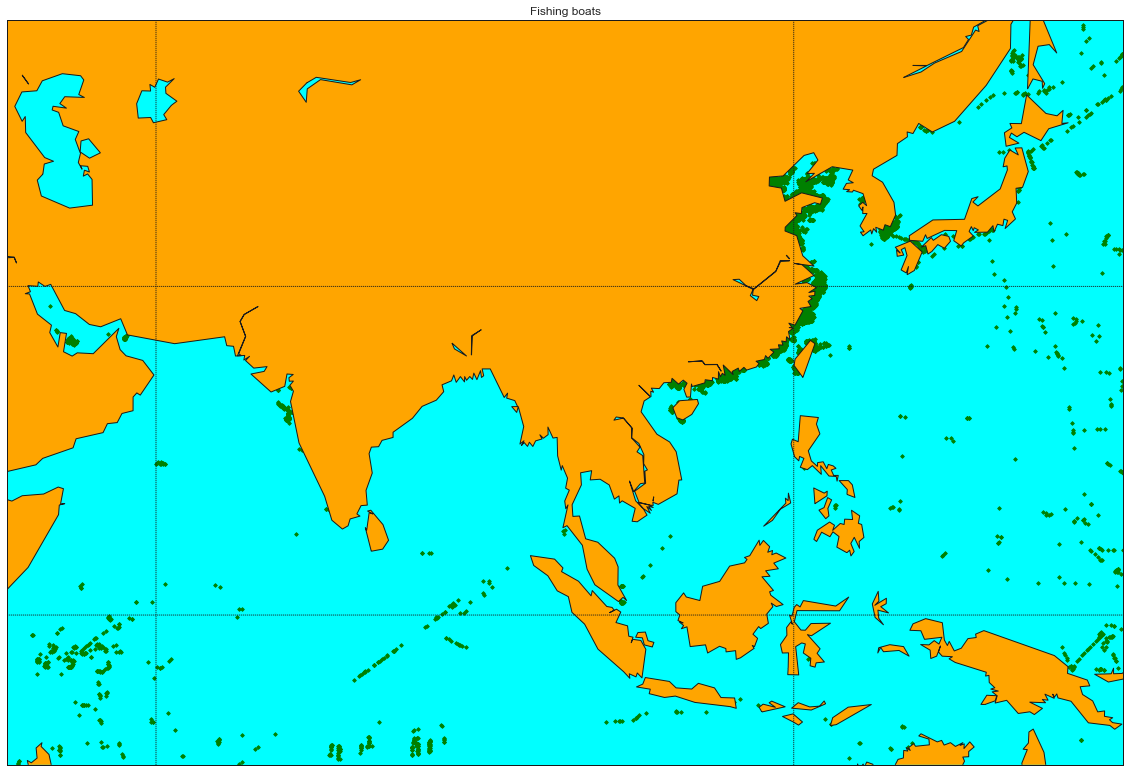

In [16]:
plt.figure(figsize=(20,15))

m = Basemap(projection='mill',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

lon_array = df.lon_bin.to_numpy()
lat_array = df.lat_bin.to_numpy()
x,y = m(lon_array,lat_array)
m.scatter(x,y,color="green",marker='D',s=np.pi*2)
plt.title("Fishing boats")
plt.show()

In [18]:
X2 = df.loc[:,["lon_bin","lat_bin"]]
X2 = X2.values

In [19]:
HC = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
HC.fit(X2)
y2 = HC.labels_

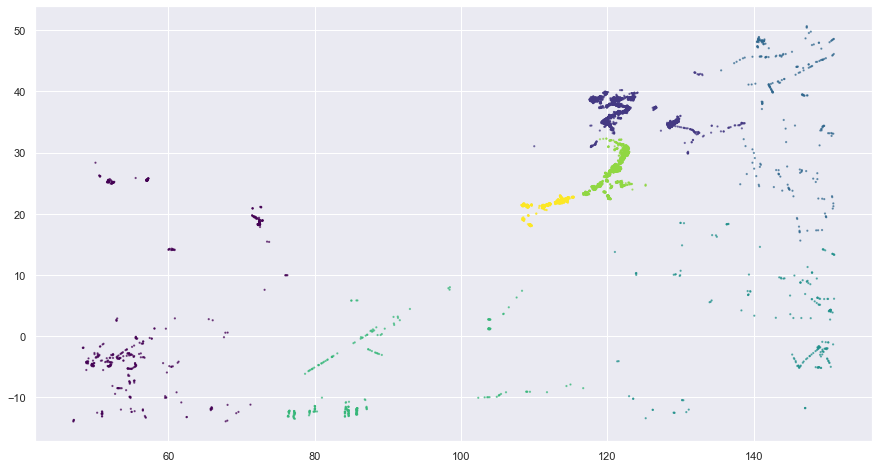

In [20]:
plt.figure(figsize=(15,8))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=np.pi/2, cmap='viridis', alpha = 0.6)

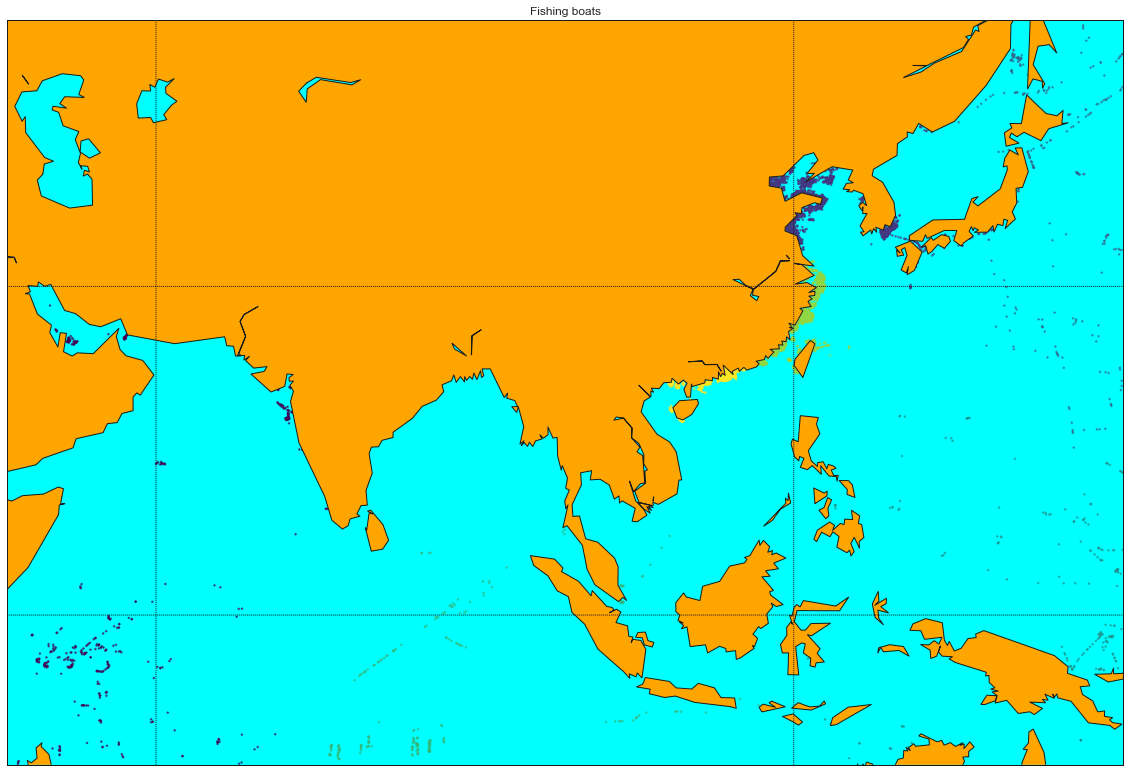

In [21]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x,y = m(X2[:, 0],X2[:, 1])
m.scatter(x,y, c=y2 ,marker='D', s=np.pi/2, cmap='viridis', alpha = 0.6)
plt.title("Fishing boats")
plt.show()